# ACUPen

## Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
train_path = "/content/gdrive/MyDrive/ACUPen/avatars_echOvid_train_X.csv"
test_path = "/content/gdrive/MyDrive/ACUPen/avatars_echOvid_test_X.csv"

In [ ]:
import numpy as np
import pandas as pd
import missingno as msno
!pip install fancyimpute
import fancyimpute
from fancyimpute import IterativeImputer, KNN
import matplotlib.pyplot as plt

## Load data

There are 262 patients in training set and 66 patients in test set.

In [ ]:
columns_name = [
                "id",
                "centre",
                "age",
                "sexe",
                "provenance",
                "echographiste",
                "tabagisme",
                "bpco",
                "asthme",
                "autre_antecedent_respiratoire",
                "hypertension",
                "cardiopathie_ischenique",
                "cardiopathie_rythmique",
                "diabete_1",
                "diabete_2",
                "diabetes",
                "cancer",
                "demence",
                "immunodeprime",
                "ains_long_cours",
                "ains_ponctuel_recent",
                "tension_systolique",
                "tension_diastolique",
                "bpm",
                "freq_resp",
                "temperature",
                "confusion",
                "saturation_o2",
                "date_debut_symptomatologie",
                "zone_ant_dh",
                "zone_ant_db",
                "zone_ant_gh",
                "zone_ant_gb",
                "zone_post_dh",
                "zone_post_db",
                "zone_post_gh",
                "zone_post_gb",
                "oxygenotherapie",
                "outcome"
]

In [ ]:
train = pd.read_csv(train_path, names=columns_name, header=0, index_col="id")

In [ ]:
test = pd.read_csv(test_path, names=columns_name[:-1], header=0, index_col="id")

## missingno graph

#### Train graph

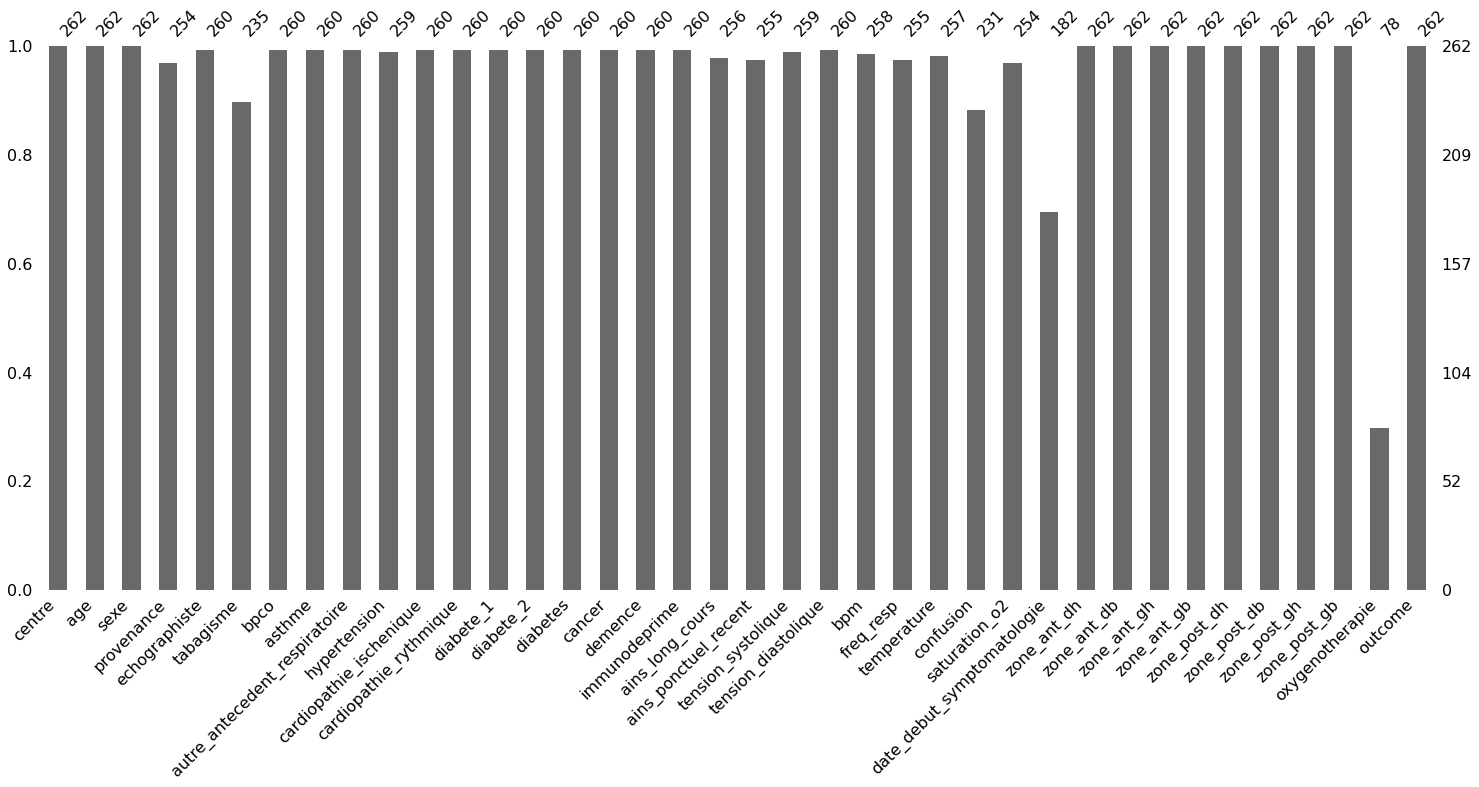

In [ ]:
msno.bar(train)

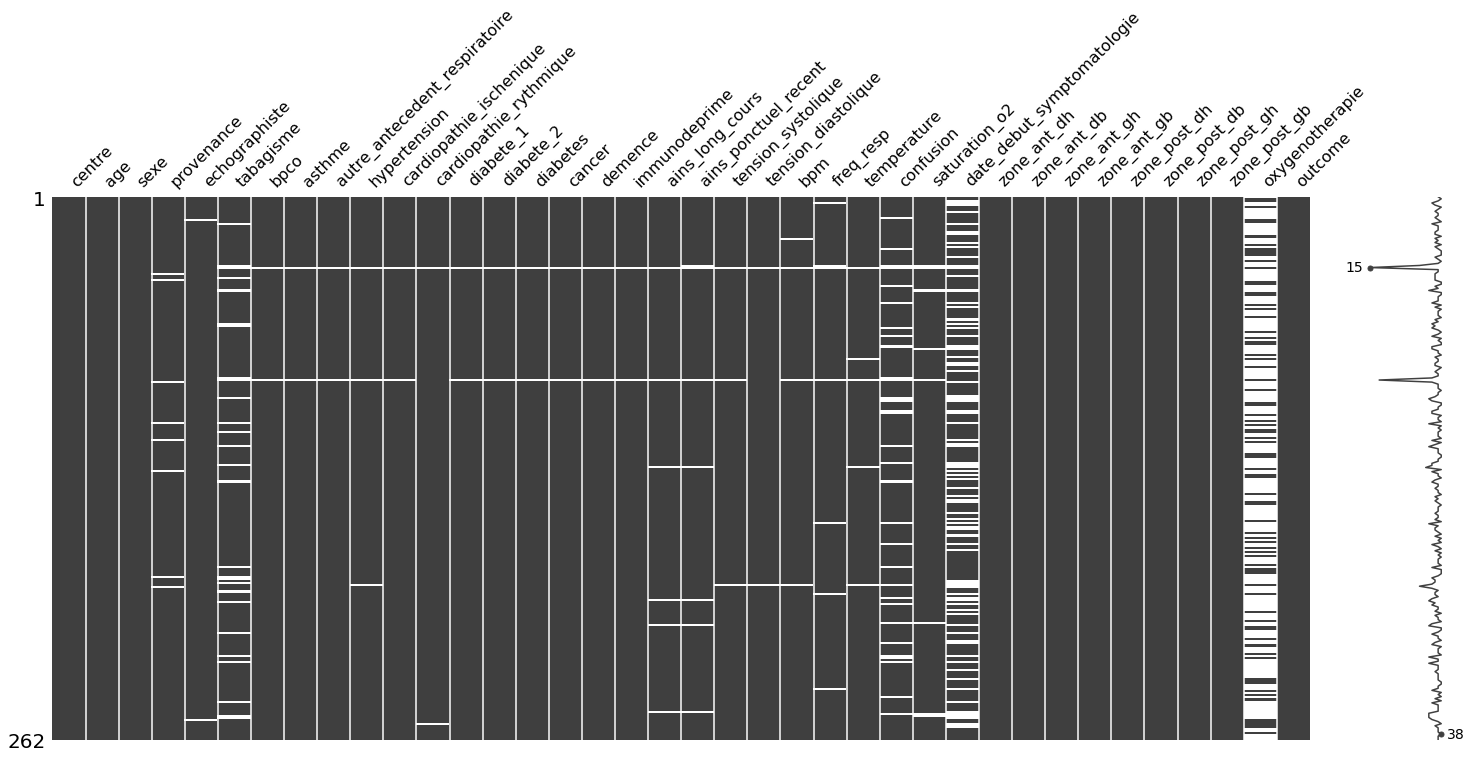

In [ ]:
msno.matrix(train)

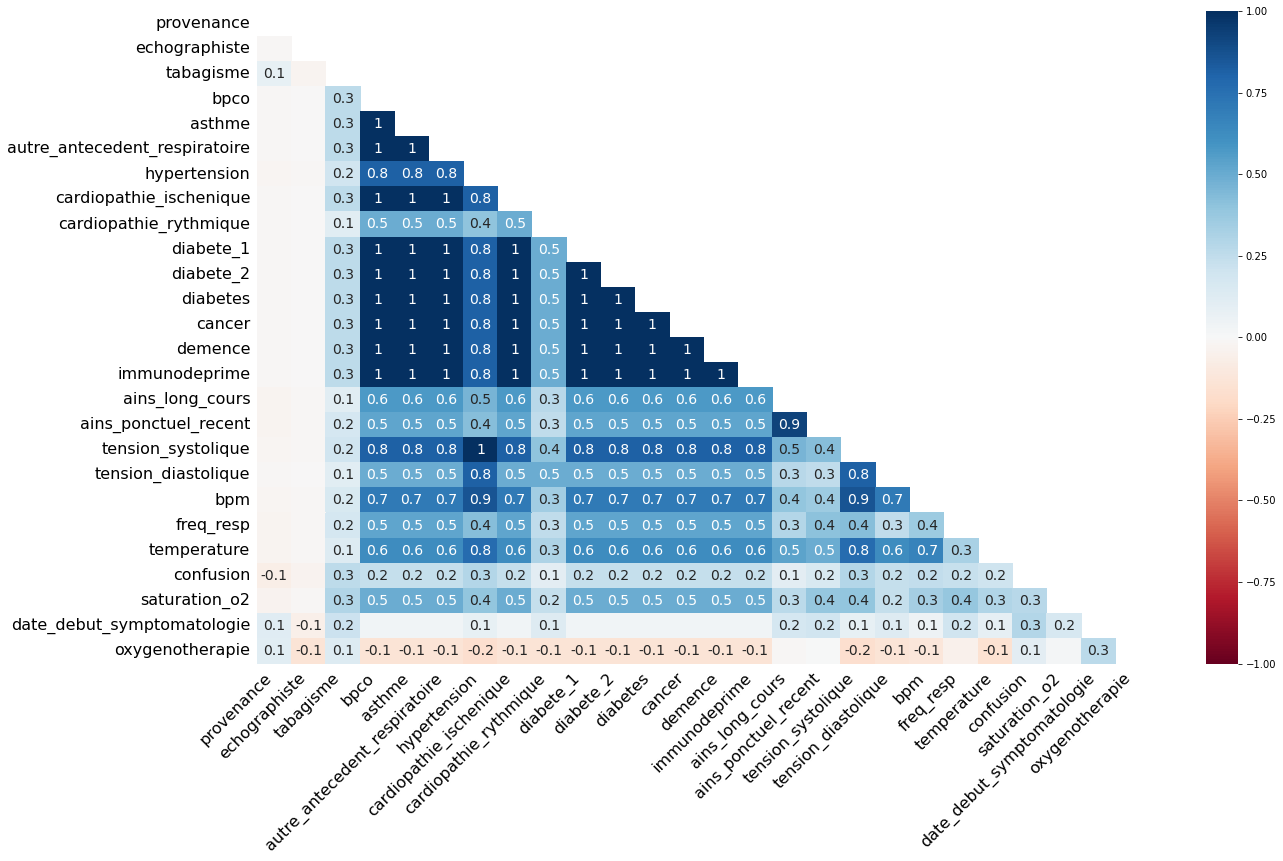

In [ ]:
msno.heatmap(train)

#### Test graph

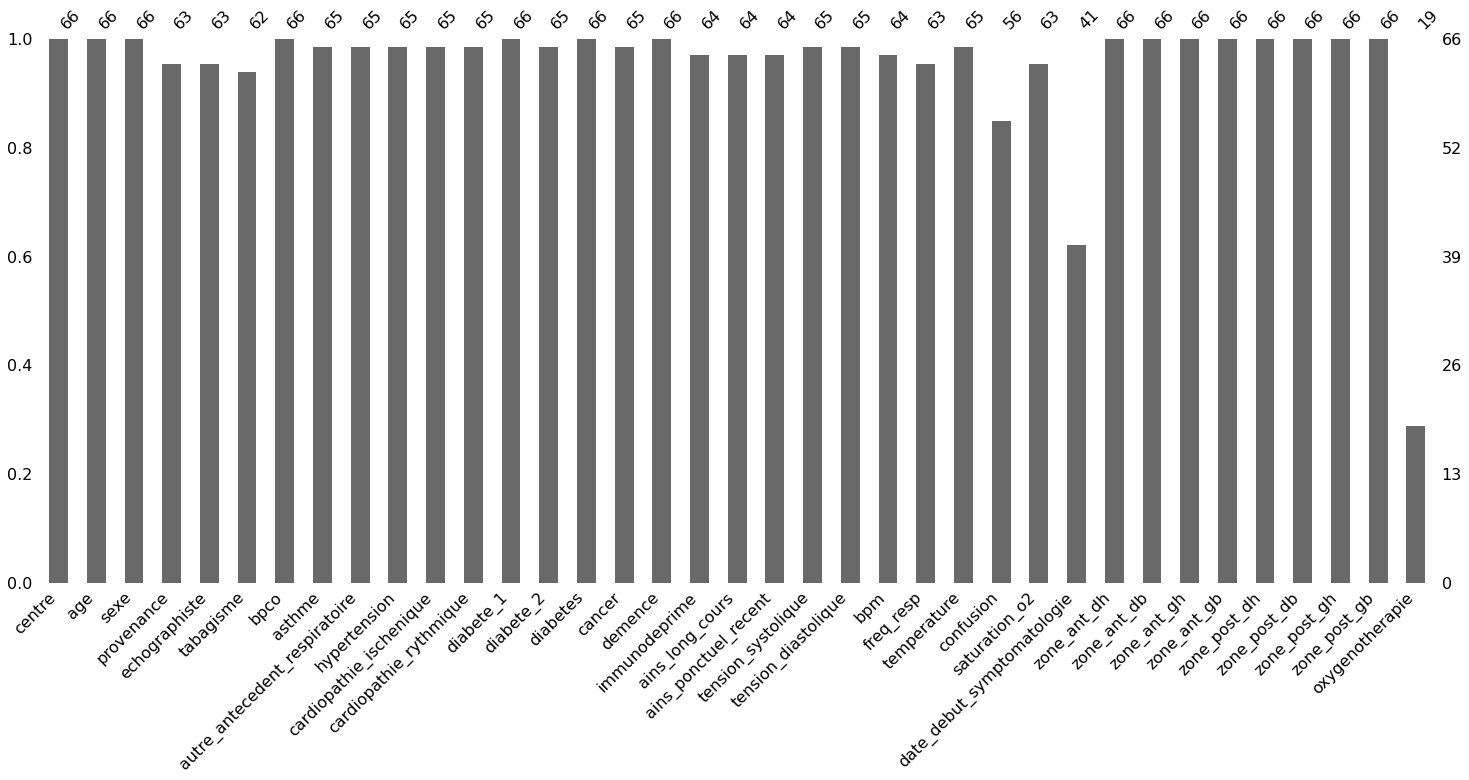

In [ ]:
msno.bar(test)

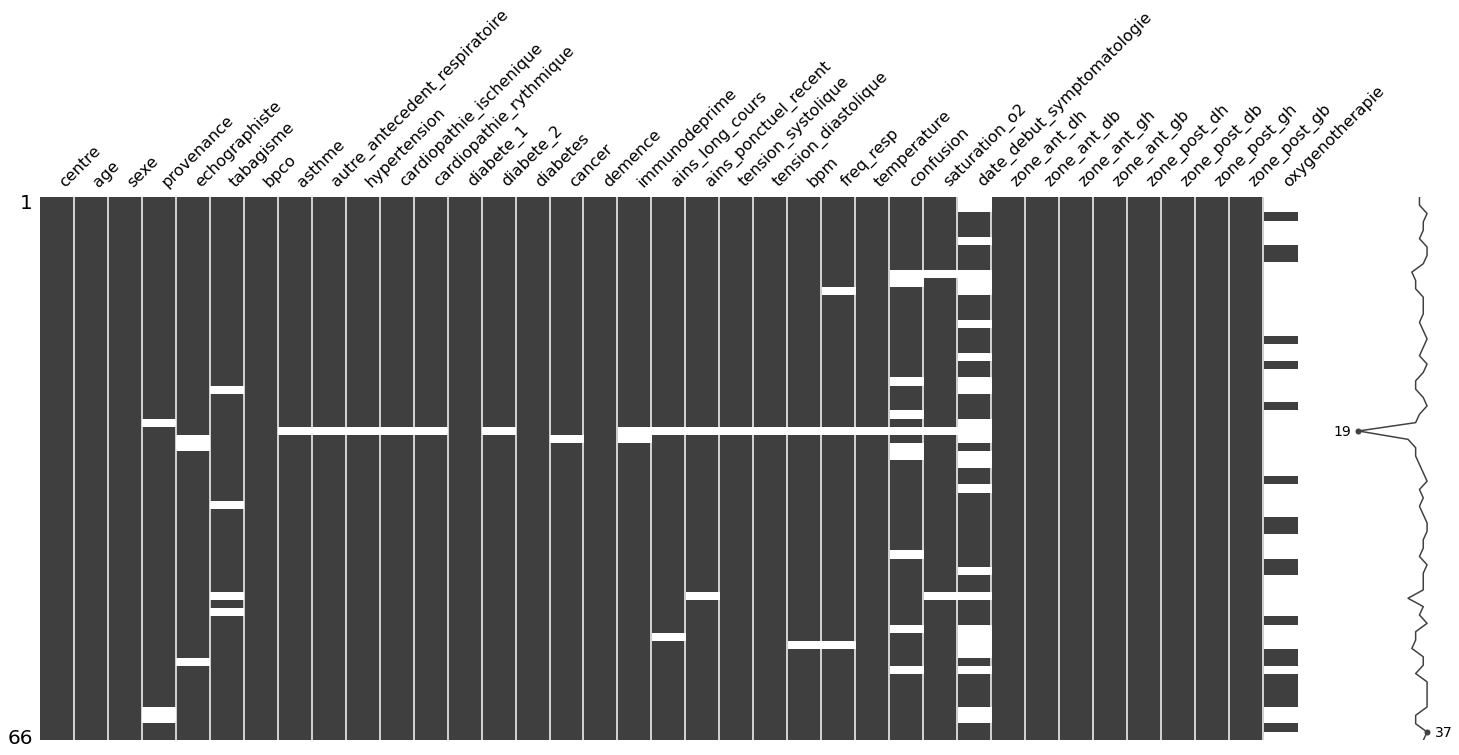

In [ ]:
msno.matrix(test)

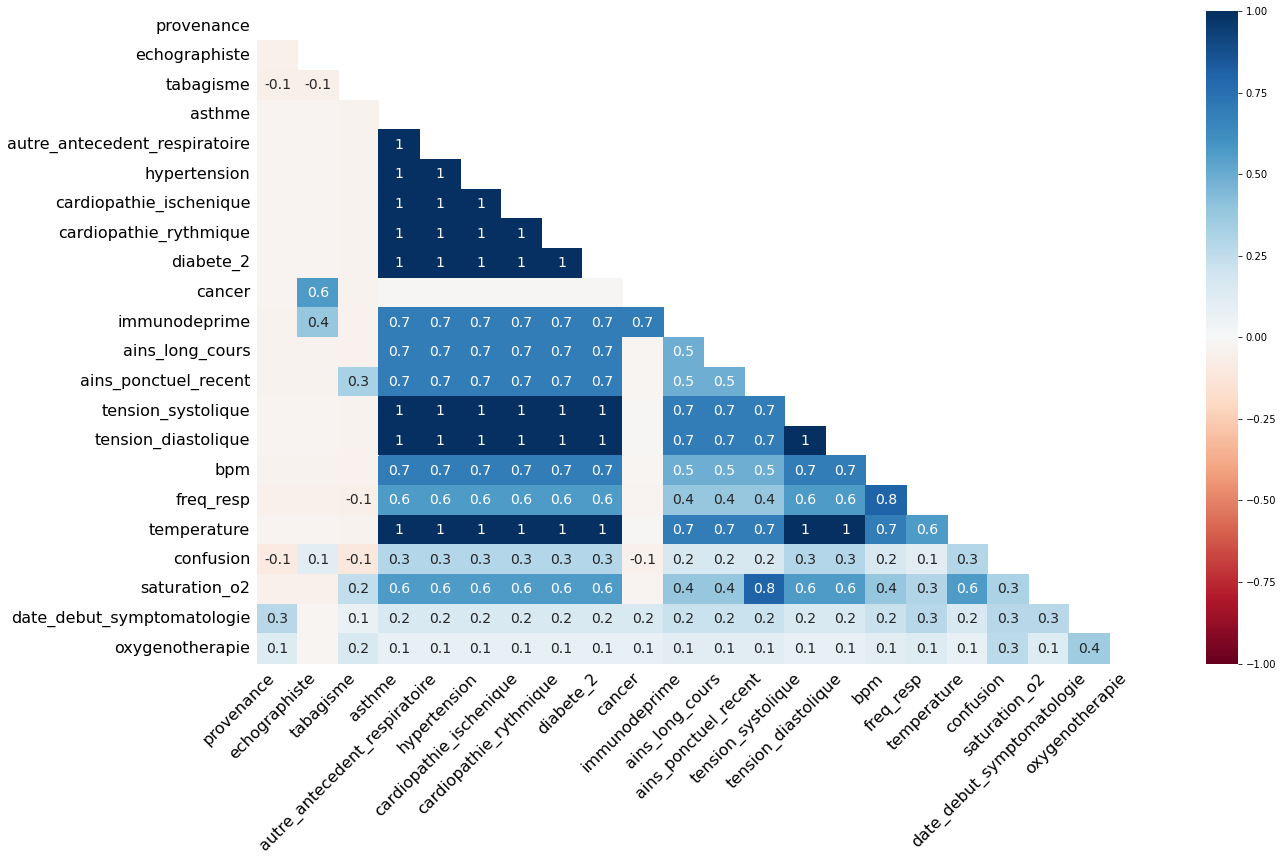

In [ ]:
msno.heatmap(test)

## Cleaning data

In [ ]:
def clean_dataframe(df, train=True):
    df.replace({'Oui': True, 'Non': False}, inplace=True)
    df.replace({'Stade 0': 0, 'Stade 1': 1, 'Stade 2': 2, 'Stade 3': 3}, inplace=True)
    df.sexe.replace({'Masculin': False, 'Feminin': True}, inplace=True)
    df.provenance.replace({'Domicile': 0, 'Autre': 1, 'EHPAD': 2, 'Hopital': 3}, inplace=True)
    df.oxygenotherapie.replace({'Air ambiant': 0, 'Moderee': 1, 'Assistance respiratoire': 2}, inplace=True)
    df.echographiste.replace({"Forme pour l'epidemie": 0, "Experience d'echographie": 1, 'Expert': 2}, inplace=True)

    #one_hot_centres = pd.get_dummies(df['centre'], prefix='centre')
    #df.drop('centre', axis=1, inplace=True)
    #df = pd.concat([one_hot_centres, df], axis=1)

    # sum all zone columns
    zone_filter = df.filter(regex="zone_*")
    df["gs_score"] = zone_filter.sum(axis=1)
    df = df[df.columns.drop(list(zone_filter))]

    if train:
        df['outcome'] = df['outcome'].replace({'Back home': 0, 'Hospitalization': 1, 'Intensive care unit': 2, 'Death': 3}).astype(int)
        
        #one_hot_outcome = pd.get_dummies(df['outcome'], prefix='outcome')
        #df.drop('outcome', axis=1, inplace=True)
        #df = pd.concat([df, one_hot_outcome], axis=1)

    # drop columns
    df.drop("date_debut_symptomatologie", axis=1, inplace=True)
    df.drop('centre', axis=1, inplace=True)
    df.drop('echographiste', axis=1, inplace=True)
    df.drop('diabete_1', axis=1, inplace=True)
    df.drop('diabetes', axis=1, inplace=True)
    df.drop('oxygenotherapie', axis=1, inplace=True)

    # fillna
    knn = IterativeImputer().fit_transform(df)
    df = pd.DataFrame(knn, columns=df.columns, index=df.index) 
    #df.provenance.fillna(-1, inplace=True)
    #df.oxygenotherapie.fillna(-1, inplace=True)

    # dropna
    #df.dropna(inplace=True)

    if train:
        df['outcome'] = df['outcome'].astype(int)

    return df

### Cleaning train

In [ ]:
train = clean_dataframe(train)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Cleaning test

In [ ]:
test = clean_dataframe(test, train=False)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Show data

In [ ]:
train

,age,sexe,provenance,tabagisme,bpco,asthme,autre_antecedent_respiratoire,hypertension,cardiopathie_ischenique,cardiopathie_rythmique,diabete_2,cancer,demence,immunodeprime,ains_long_cours,ains_ponctuel_recent,tension_systolique,tension_diastolique,bpm,freq_resp,temperature,confusion,saturation_o2,outcome,gs_score
id,,,,,,,,,,,,,,,,,,,,,,,,,
1,91.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,164.0,64.0,80.0,35.000000,37.7,0.0,79.0,3,15.0
109,45.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,147.0,91.0,97.0,15.000000,37.0,0.0,99.0,0,1.0
46,76.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,119.0,72.0,89.0,27.000000,37.2,1.0,97.0,1,8.0
247,55.0,1.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,145.0,78.0,93.0,21.063908,35.8,0.0,100.0,0,0.0
195,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.0,80.0,89.0,16.000000,37.0,0.0,100.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,34.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.0,73.0,75.0,20.000000,38.2,0.0,99.0,0,0.0
199,58.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138.0,84.0,105.0,35.000000,37.2,0.0,97.0,1,5.0
117,45.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,119.0,71.0,75.0,21.000000,37.0,0.0,99.0,0,0.0


In [ ]:
test

,age,sexe,provenance,tabagisme,bpco,asthme,autre_antecedent_respiratoire,hypertension,cardiopathie_ischenique,cardiopathie_rythmique,diabete_2,cancer,demence,immunodeprime,ains_long_cours,ains_ponctuel_recent,tension_systolique,tension_diastolique,bpm,freq_resp,temperature,confusion,saturation_o2,gs_score
id,,,,,,,,,,,,,,,,,,,,,,,,
237,39.0,1.0,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124.0,82.0,90.0,18.0,37.3,0.0,97.0,0.0
236,42.0,0.0,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.0,69.0,70.0,17.0,36.8,0.0,100.0,0.0
253,70.0,1.0,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,110.0,71.0,88.0,25.0,38.0,1.0,93.0,6.0
92,81.0,1.0,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,140.0,93.0,83.0,34.0,37.6,0.0,97.0,0.0
53,67.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,117.0,68.0,80.0,23.0,37.3,0.0,90.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,65.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.0,51.0,105.0,27.0,38.3,0.0,95.0,22.0
39,63.0,1.0,0.597935,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,121.0,63.0,68.0,16.0,37.0,0.0,100.0,0.0
313,63.0,1.0,0.652400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.0,61.0,71.0,13.0,37.4,0.0,100.0,0.0


## Correlation between data

In [ ]:
df_all_corr = train.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_all_corr[df_all_corr['Feature 1'] == 'tabagisme']

,Feature 1,Feature 2,Correlation Coefficient
19,tabagisme,tabagisme,1.000000
162,tabagisme,temperature,0.174650
187,tabagisme,age,0.150581
198,tabagisme,bpco,0.144257
205,tabagisme,freq_resp,0.137239
237,tabagisme,outcome,0.118956
260,tabagisme,gs_score,0.109738
264,tabagisme,saturation_o2,0.107064
297,tabagisme,ains_long_cours,0.089687
308,tabagisme,asthme,0.086928


## Prediction on part of the train set + Visualization

In [ ]:
!pip install shap

In [ ]:
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier
import xgboost
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
import shap

In [ ]:
X,y = shap.datasets.adult()
X_display,y_display = shap.datasets.adult(display=True)

In [ ]:
X_train, X_valid, Y_train, Y_valid = train_test_split(
    train.drop("outcome", axis=1),
    train["outcome"],
    test_size=0.3,
    random_state=42
)

### Deal with imbalanced data

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

print('Distribution of y_train set Before over and under sampling: ', Counter(Y_train))

under = RandomUnderSampler(sampling_strategy={0: 50, 1: 50}, random_state=21)
over = SMOTE(sampling_strategy={2: 80, 3: 100}, random_state=21)

X_train_smote, Y_train_smote = under.fit_resample(X_train, Y_train)
X_train_both, Y_train_both = over.fit_resample(X_train_smote, Y_train_smote)

print('Distribution of y_train set Before over and under sampling: ', Counter(Y_train_both))

Distribution of y_train set Before over and under sampling:  Counter({0: 102, 1: 67, 3: 7, 2: 7})
Distribution of y_train set Before over and under sampling:  Counter({3: 100, 2: 80, 0: 50, 1: 50})


After over-sampling, the number of samples (80) in class 2 will be larger than the number of samples in the majority class (class #0 -> 50)
After over-sampling, the number of samples (100) in class 3 will be larger than the number of samples in the majority class (class #0 -> 50)


### Linear Regression


In [ ]:
linear = LinearRegression()
linear.fit(X_train, Y_train)

LinearRegression()

In [ ]:
predictions = np.round(linear.predict(X_valid))
predictions

array([ 0., -0.,  0.,  0.,  2.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,
        2.,  1.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
        1.,  0.,  0., -0.,  0.,  1.,  0.,  1.,  2.,  1.,  0.,  0.,  1.,
        1.,  1.,  0., -0.,  2.,  0.,  0.,  2.,  1., -0., -0.,  1., -0.,
       -0.,  0., -1.,  1.,  1.,  1.,  0., -0.,  0., -0.,  0., -0.,  2.,
        1.])

In [ ]:
list(Y_valid) == predictions

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True, False,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
       False,  True, False, False,  True,  True,  True,  True,  True,
        True,  True, False,  True, False, False, False,  True,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False])

### XGBoost

In [ ]:
#Defining the parameters to search within
param_grid = {
    'n_estimators': [400],
    'max_depth': [5],
    'learning_rate': [.0029],
    'colsample_bytree': [0.4],
    'scale_pos_weight': [10],
}
#Specifying our classifier
xgb = XGBClassifier(colsample_bytree = 0.4, learning_rate= 0.03, max_depth = 3, n_estimators = 900, scale_pos_weight = 10)
#Searching for the best parameters
g_search = GridSearchCV(estimator = xgb, param_grid = param_grid,
cv = 3, n_jobs = 4, verbose = 3, return_train_score=True)
#Fitting the model using best parameters found
g_search.fit(X_train_both, Y_train_both)
#xgb.fit(X_train, Y_train)#, feature_weights=[3,0.5,2,2,4,2,2,1,1,1,2,2,0.5,5,1,1,1,1,1,3,2,0.5,3,3,5])
#Printing the best parameters found
print(g_search.best_params_)
g_search.score(X_valid, Y_valid)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
{'colsample_bytree': 0.4, 'learning_rate': 0.0029, 'max_depth': 5, 'n_estimators': 400, 'scale_pos_weight': 10}


0.8481012658227848

#### XGBoost visualization

In [ ]:
xgboost.plot_importance(xgb)

XGBoostError: ignored

In [ ]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_train)

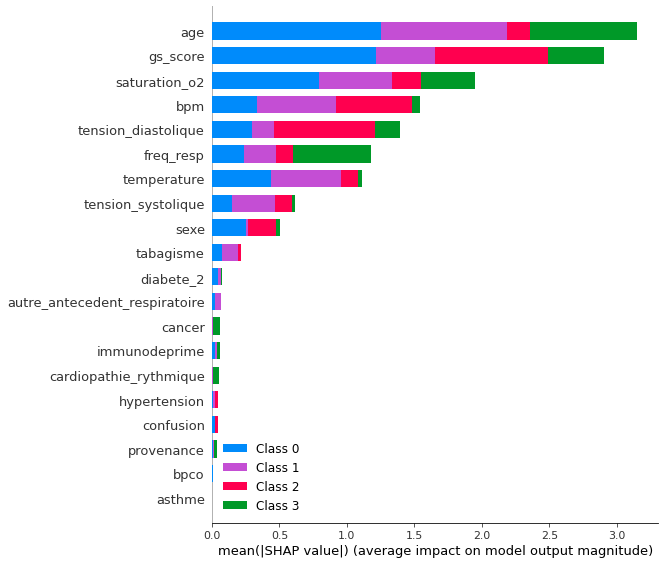

In [ ]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

#### XGBoost prediction

In [ ]:
predictions = g_search.predict(X_valid)

### Random Forest classifier

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
predictions = clf.predict(X_valid)

### Score

In [ ]:
accuracy_score(Y_valid, predictions)

0.8481012658227848

In [ ]:
f1_score(Y_valid, predictions, average='weighted')

0.8471715654723592

In [ ]:
print(classification_report(Y_valid, predictions))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        44
           1       0.80      0.83      0.81        29
           2       0.50      0.50      0.50         4
           3       1.00      0.50      0.67         2

    accuracy                           0.85        79
   macro avg       0.80      0.68      0.72        79
weighted avg       0.85      0.85      0.85        79



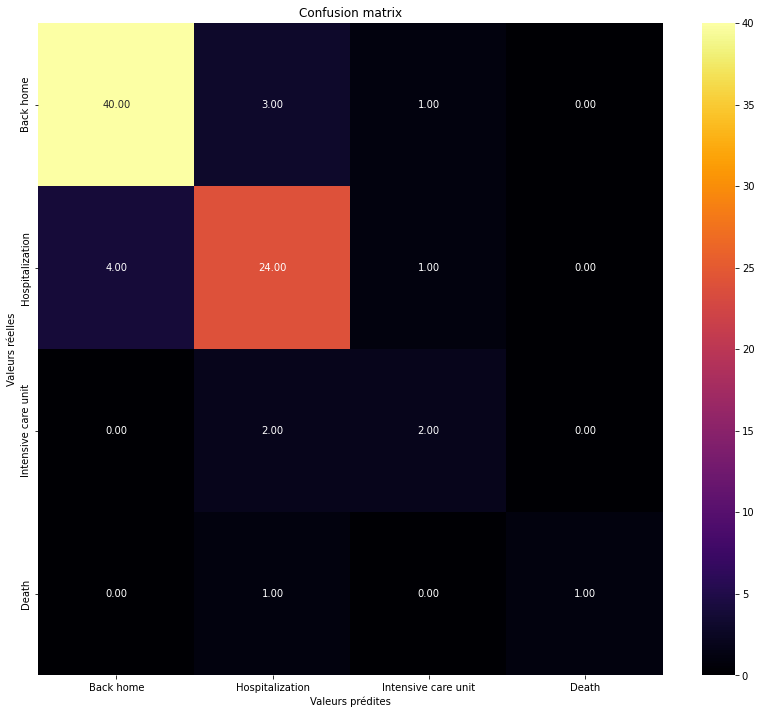

In [ ]:
cf_matrix = confusion_matrix(Y_valid, predictions)
plt.figure(figsize=(14,12))
plt.title("Confusion matrix")

sns.heatmap(cf_matrix,
            annot=True,
            fmt='.2f',
            cmap='inferno',
            xticklabels=["Back home", "Hospitalization", "Intensive care unit", "Death"],
            yticklabels=["Back home", "Hospitalization", "Intensive care unit", "Death"]
)

plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.show()

## Prediction on testset

### Training with all data

In [ ]:
X_train = train.drop("outcome", axis=1)
Y_train = train["outcome"]

In [ ]:
linear = LinearRegression()
linear.fit(X_train, Y_train)

LinearRegression()

### Predict test set

In [ ]:
predictions = np.round(linear.predict(test))
predictions

In [ ]:
def create_submission_csv(test_df, predictions, filename):
    submission = pd.DataFrame()

    for i, id in enumerate(test_df.index):
        label = ""

        if predictions[i] == 0:
            label = "Back home"
        elif predictions[i] == 1:
            label = "Hospitalization"
        elif predictions[i] == 2:
            label = "Intensive care unit"
        elif predictions[i] == 3:
            label = "Death"

        row = pd.Series([id, label])
        df_row = pd.DataFrame([row])

        submission = pd.concat([submission, df_row])

    submission.rename(columns={0: "id", 1: "prediction"}, inplace=True)
    submission.set_index('id', inplace=True)
    submission.to_csv(filename)

In [ ]:
create_submission_csv(test, predictions, "submission-acupen-linear.csv")

NameError: ignored